Loading customer profile data...

Data Shape: (4194, 9)

First few rows:


,CustomerID,AvgOrderValue,PurchaseVariability,DaysSinceFirstPurchase,AvgDaysBetweenPurchases,UniqueProducts,Recency,Frequency,Monetary
0,12347,0.0,0.0,0.0,0.0,0.0,2,7,3174.62
1,12348,0.0,0.0,0.0,0.0,0.0,75,4,601.64
2,12349,0.0,0.0,0.0,0.0,0.0,19,1,1145.35
3,12350,0.0,0.0,0.0,0.0,0.0,310,1,334.40
4,12352,0.0,0.0,0.0,0.0,0.0,36,7,1505.74



Preparing data for clustering...

Missing Values Count:
Recency                    0
Frequency                  0
Monetary                   0
AvgOrderValue              0
PurchaseVariability        0
AvgDaysBetweenPurchases    0
UniqueProducts             0
dtype: int64


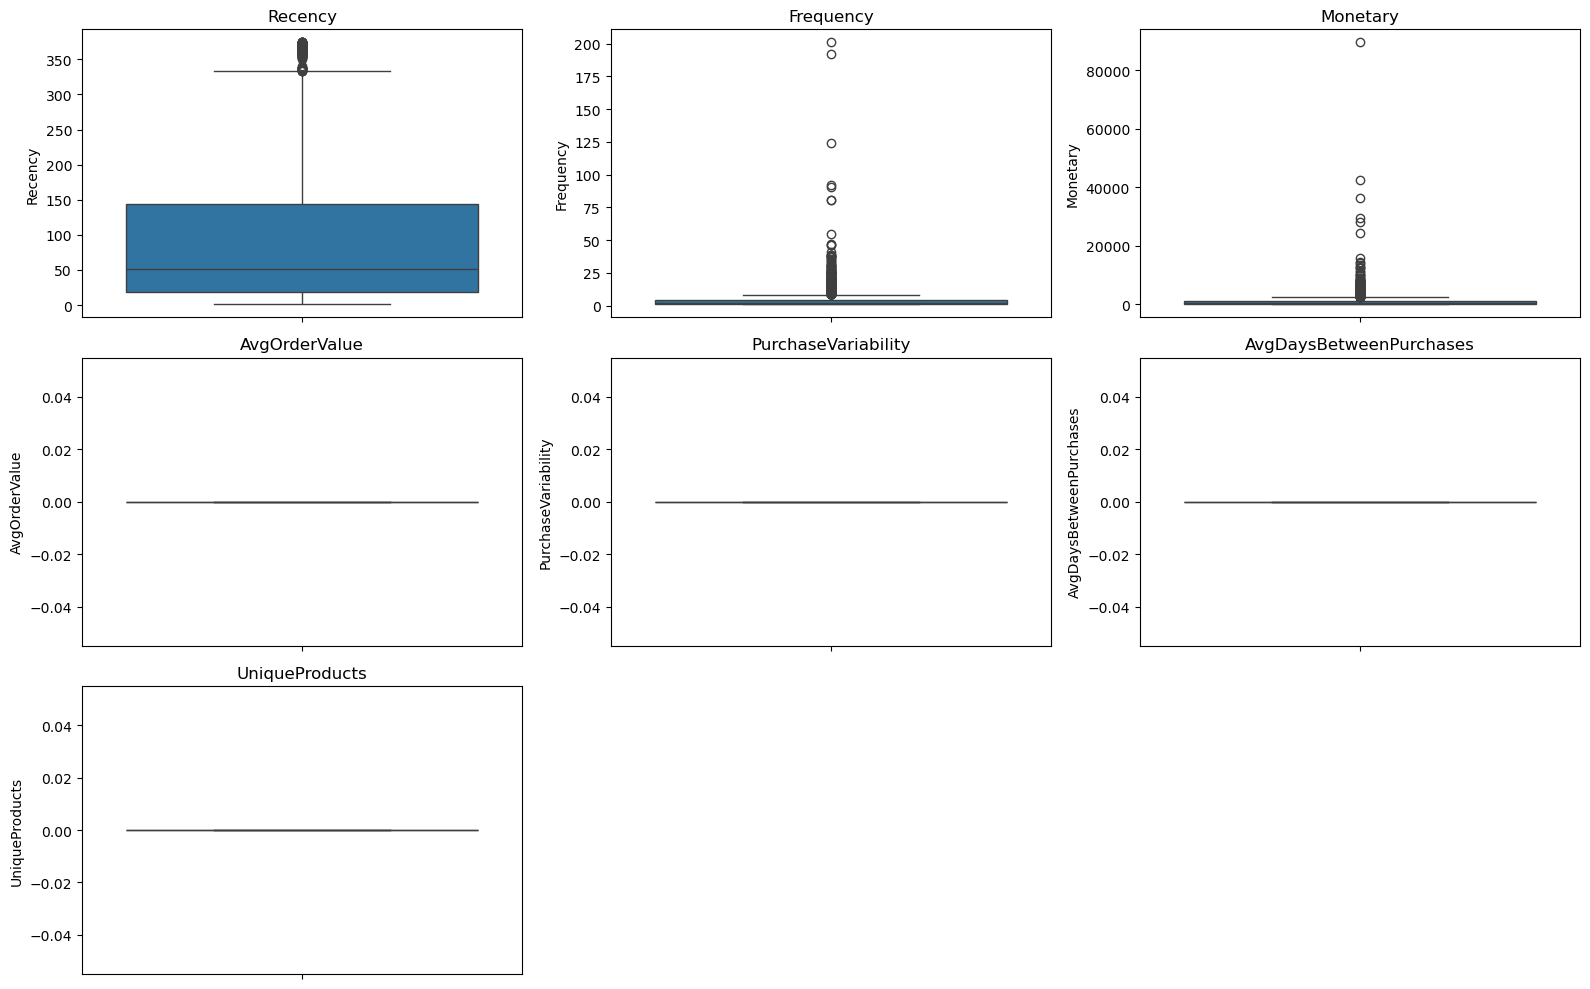


Performing PCA for visualization...


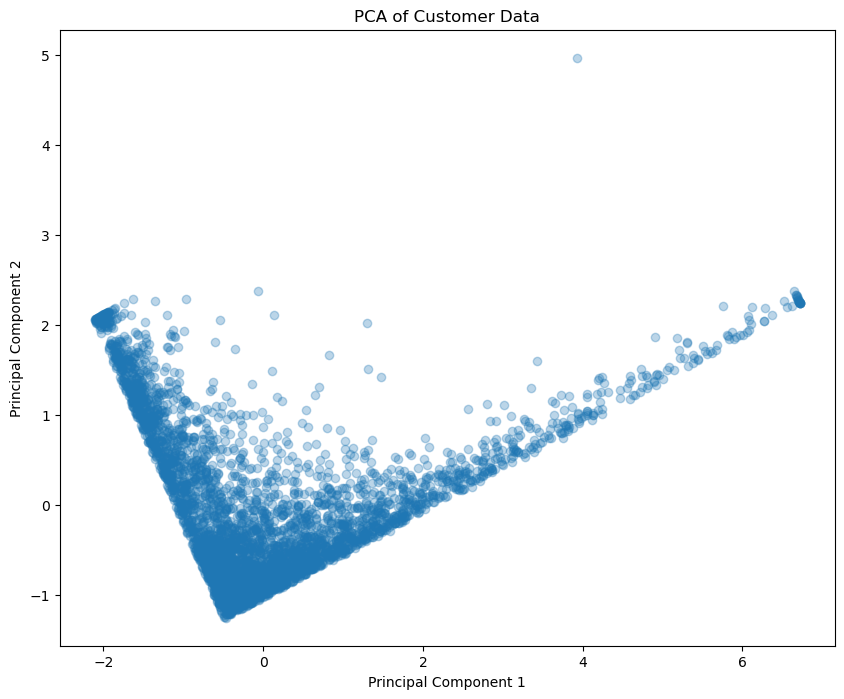

Explained variance ratio: [0.68662045 0.24936431]
Total explained variance: 0.94

Determining optimal number of clusters...


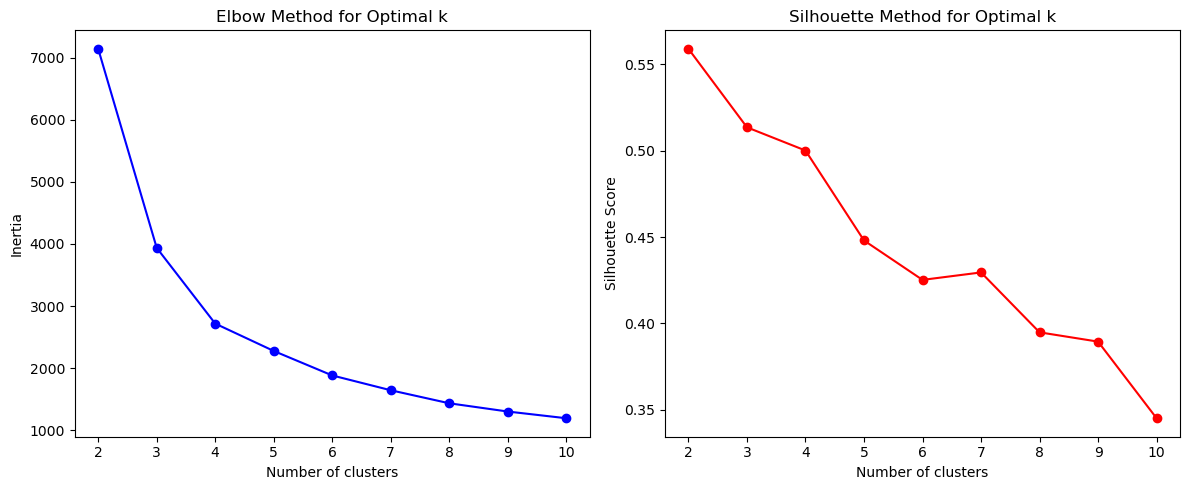


Implementing K-means clustering with 4 clusters...

Analyzing clusters...


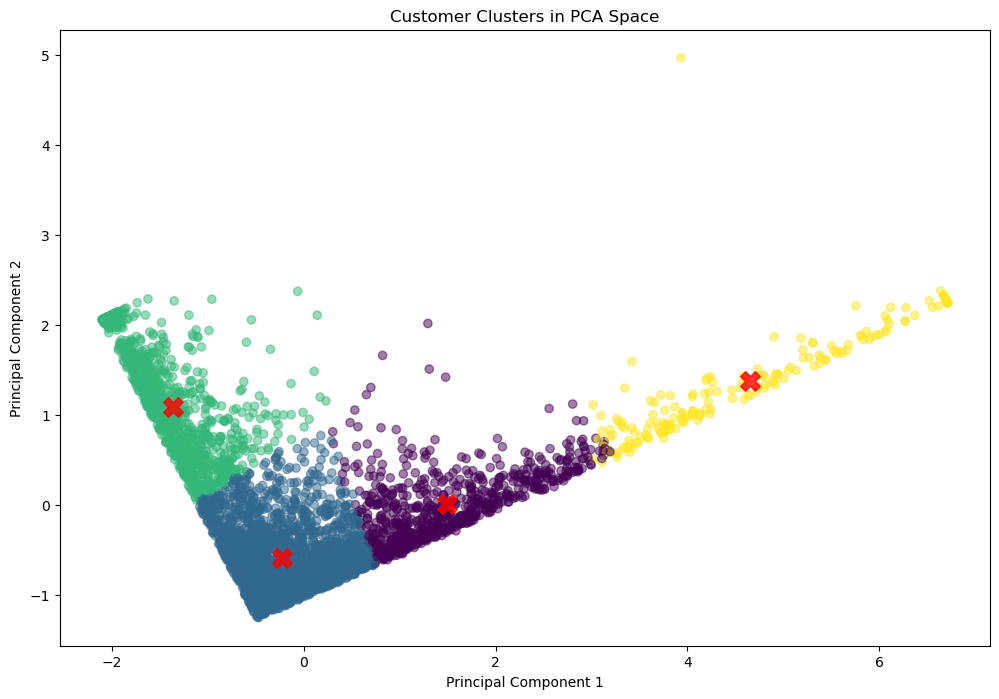

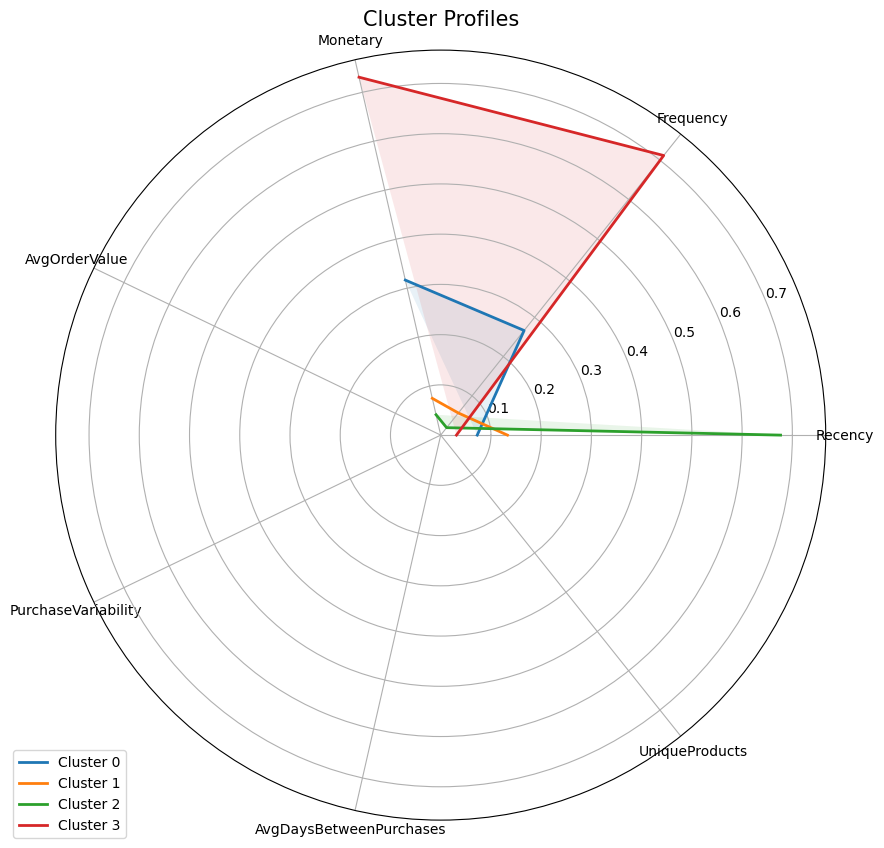


Cluster Statistics:


,Recency,Frequency,Monetary,AvgOrderValue,PurchaseVariability,AvgDaysBetweenPurchases,UniqueProducts
Cluster,,,,,,,
0,27.761299,7.658192,2246.089802,0.0,0.0,0.0,0.0
1,49.884247,2.407311,549.035645,0.0,0.0,0.0,0.0
2,250.139165,1.473161,313.903570,0.0,0.0,0.0,0.0
3,12.543956,24.010989,6749.635989,0.0,0.0,0.0,0.0



Cluster Sizes:


,Count,Percentage
Cluster,,
0,708,16.881259
1,2298,54.792561
2,1006,23.986648
3,182,4.339533



Detailed Cluster Breakdown:

Cluster 0 Profile:
Number of Customers: 708 (16.88%)
Average Recency: 27.76 days
Average Frequency: 7.66 orders
Average Monetary Value: $2246.09
Average Order Value: $0.00
Average Days Between Purchases: 0.00 days
Average Unique Products: 0.00 products

Cluster 1 Profile:
Number of Customers: 2298 (54.79%)
Average Recency: 49.88 days
Average Frequency: 2.41 orders
Average Monetary Value: $549.04
Average Order Value: $0.00
Average Days Between Purchases: 0.00 days
Average Unique Products: 0.00 products

Cluster 2 Profile:
Number of Customers: 1006 (23.99%)
Average Recency: 250.14 days
Average Frequency: 1.47 orders
Average Monetary Value: $313.90
Average Order Value: $0.00
Average Days Between Purchases: 0.00 days
Average Unique Products: 0.00 products

Cluster 3 Profile:
Number of Customers: 182 (4.34%)
Average Recency: 12.54 days
Average Frequency: 24.01 orders
Average Monetary Value: $6749.64
Average Order Value: $0.00
Average Days Between Purchases: 0.0

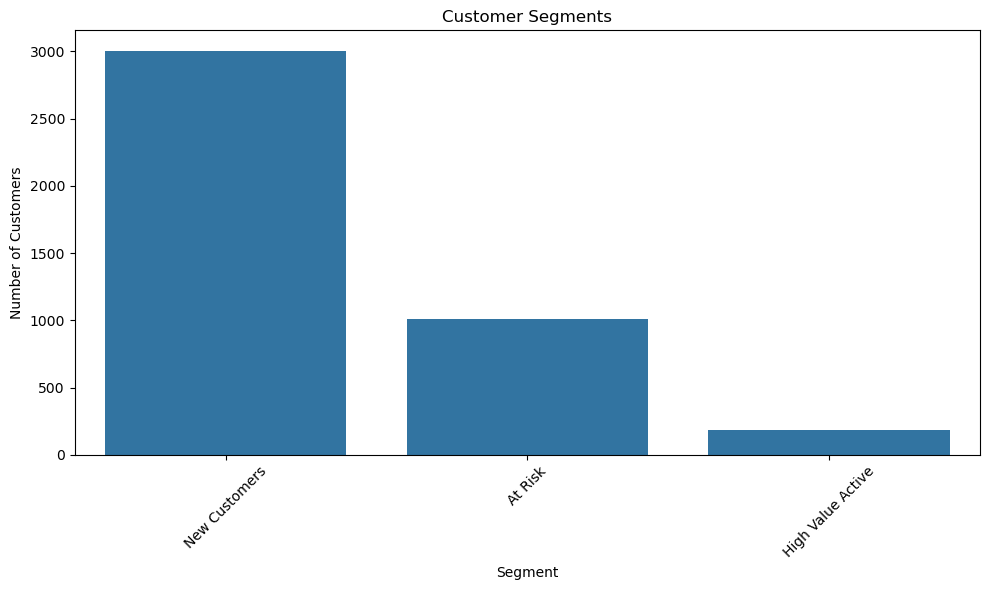


Segment Statistics:


,Recency,Frequency,Monetary,AvgOrderValue,PurchaseVariability,AvgDaysBetweenPurchases,UniqueProducts
Segment,,,,,,,
At Risk,250.139165,1.473161,313.903570,0.0,0.0,0.0,0.0
High Value Active,12.543956,24.010989,6749.635989,0.0,0.0,0.0,0.0
New Customers,44.673653,3.644045,948.741016,0.0,0.0,0.0,0.0



Segment Sizes:


,Count,Percentage
Segment,,
At Risk,1006,23.986648
High Value Active,182,4.339533
New Customers,3006,71.673820



Saving segmentation results...

Segmentation completed!

Creating customer segment recommendations...

Segment Recommendations:


,Segment,Description,Strategy,Expected_Retention_Increase
0,New Customers,Recent first-time or early-stage customers,"Welcome series, educational content, second pu...",0.12
1,At Risk,Customers who haven't purchased recently but u...,"Re-engagement emails, win-back discounts, surv...",0.15
2,High Value Active,Customers who shop frequently and spend a lot,"VIP program, early access to new products, per...",0.05



Overall expected retention increase by implementing all strategies: 12.42%


In [3]:
# Customer Retention Project - Customer Segmentation
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('../3_Models', exist_ok=True)

# 1. Load the data
print("Loading customer profile data...")
customer_profile = pd.read_csv('../1_Data/processed/customer_profile.csv')

print("\nData Shape:", customer_profile.shape)
print("\nFirst few rows:")
display(customer_profile.head())

# 2. Prepare data for clustering
print("\nPreparing data for clustering...")

# 2.1. Select features for segmentation
# We'll use RFM and additional behavioral metrics
features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 
            'PurchaseVariability', 'AvgDaysBetweenPurchases', 'UniqueProducts']

# Keep only the necessary columns
segment_data = customer_profile[features].copy()

# 2.2. Check for missing values and handle them
print("\nMissing Values Count:")
print(segment_data.isnull().sum())

# Fill remaining NaN values with 0
segment_data.fillna(0, inplace=True)

# 2.3. Check for and handle outliers
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=segment_data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Cap outliers using quantiles to reduce their impact on clustering
for feature in features:
    Q1 = segment_data[feature].quantile(0.01)
    Q3 = segment_data[feature].quantile(0.99)
    segment_data[feature] = segment_data[feature].clip(Q1, Q3)

# 2.4. Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segment_data)
scaled_df = pd.DataFrame(scaled_data, columns=features)

# 3. Perform Principal Component Analysis (PCA) for visualization
print("\nPerforming PCA for visualization...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")

# 4. Determine optimal number of clusters using Elbow Method and Silhouette Score
print("\nDetermining optimal number of clusters...")

# 4.1. Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.tight_layout()
plt.show()

# 5. Implement K-means clustering with the optimal number of clusters
# Based on the elbow method and silhouette score, we'll choose the optimal k
optimal_k = 4  # This may be adjusted based on the plots
print(f"\nImplementing K-means clustering with {optimal_k} clusters...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster information to the customer profile
customer_profile['Cluster'] = clusters

# 6. Analyze and profile clusters
print("\nAnalyzing clusters...")

# 6.1. Visualize clusters in PCA space
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
centers = kmeans.cluster_centers_
pca_centers = pca.transform(centers)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.8, marker='X')
plt.show()

# 6.2. Create a radar chart for cluster profiling
def radar_chart(df, features, cluster_col, n_clusters):
    # Calculate mean values for each feature by cluster
    cluster_means = df.groupby(cluster_col)[features].mean()
    
    # Number of variables
    N = len(features)
    
    # Create angles for radar chart
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
    
    # Add feature labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    
    # Plot each cluster
    for i in range(n_clusters):
        values = cluster_means.iloc[i].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Cluster Profiles', size=15)
    plt.show()

# Normalize data for radar chart
radar_data = segment_data.copy()
for feature in features:
    radar_data[feature] = (radar_data[feature] - radar_data[feature].min()) / (radar_data[feature].max() - radar_data[feature].min())

radar_data['Cluster'] = clusters
radar_chart(radar_data, features, 'Cluster', optimal_k)

# 6.3. Show cluster statistics
print("\nCluster Statistics:")
cluster_stats = customer_profile.groupby('Cluster')[features].mean()
display(cluster_stats)

# Calculate and add additional useful metrics
cluster_sizes = customer_profile.groupby('Cluster').size()
cluster_sizes_percent = 100 * cluster_sizes / cluster_sizes.sum()

cluster_stats['Count'] = cluster_sizes
cluster_stats['Percentage'] = cluster_sizes_percent

print("\nCluster Sizes:")
display(cluster_stats[['Count', 'Percentage']])

# 6.4. Detailed breakdown of clusters
print("\nDetailed Cluster Breakdown:")
for i in range(optimal_k):
    print(f"\nCluster {i} Profile:")
    cluster_i = customer_profile[customer_profile['Cluster'] == i]
    
    print(f"Number of Customers: {len(cluster_i)} ({len(cluster_i)/len(customer_profile)*100:.2f}%)")
    print(f"Average Recency: {cluster_i['Recency'].mean():.2f} days")
    print(f"Average Frequency: {cluster_i['Frequency'].mean():.2f} orders")
    print(f"Average Monetary Value: ${cluster_i['Monetary'].mean():.2f}")
    print(f"Average Order Value: ${cluster_i['AvgOrderValue'].mean():.2f}")
    print(f"Average Days Between Purchases: {cluster_i['AvgDaysBetweenPurchases'].mean():.2f} days")
    print(f"Average Unique Products: {cluster_i['UniqueProducts'].mean():.2f} products")

# 7. Create customer segments based on RFM and clustering
print("\nCreating customer segments...")

# 7.1. Define segment names based on cluster characteristics
# We'll create a function to assign segment names
def assign_segment_name(row):
    cluster = row['Cluster']
    
    # Get average values for each cluster
    cluster_avg = cluster_stats.loc[cluster]
    
    # Define segment names based on cluster characteristics
    if cluster_avg['Recency'] < cluster_stats['Recency'].mean() and cluster_avg['Monetary'] > cluster_stats['Monetary'].mean():
        return 'High Value Active'
    elif cluster_avg['Recency'] > cluster_stats['Recency'].mean() and cluster_avg['Frequency'] < cluster_stats['Frequency'].mean():
        return 'At Risk'
    elif cluster_avg['Recency'] > cluster_stats['Recency'].mean() and cluster_avg['Monetary'] < cluster_stats['Monetary'].mean():
        return 'Lost Low Value'
    elif cluster_avg['Frequency'] > cluster_stats['Frequency'].mean() and cluster_avg['Monetary'] > cluster_stats['Monetary'].mean():
        return 'Loyal'
    else:
        return 'New Customers'

# Apply the function to assign segment names
customer_profile['Segment'] = customer_profile.apply(assign_segment_name, axis=1)

# 7.2. Visualize customer segments
plt.figure(figsize=(10, 6))
segment_counts = customer_profile['Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7.3. Show segment statistics
print("\nSegment Statistics:")
segment_stats = customer_profile.groupby('Segment')[features].mean()
display(segment_stats)

segment_sizes = customer_profile.groupby('Segment').size()
segment_sizes_percent = 100 * segment_sizes / segment_sizes.sum()

segment_stats['Count'] = segment_sizes
segment_stats['Percentage'] = segment_sizes_percent

print("\nSegment Sizes:")
display(segment_stats[['Count', 'Percentage']])

# 8. Save the results
print("\nSaving segmentation results...")

# 8.1. Save the customer profile with cluster and segment information
customer_profile.to_csv('../1_Data/processed/customer_segments.csv', index=False)

# 8.2. Save the KMeans model
with open('../3_Models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# 8.3. Save the scaler
with open('../3_Models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nSegmentation completed!")

# 9. Create customer segment recommendations
print("\nCreating customer segment recommendations...")

segment_recommendations = pd.DataFrame({
    'Segment': customer_profile['Segment'].unique()
})

segment_recommendations['Description'] = ''
segment_recommendations['Strategy'] = ''
segment_recommendations['Expected_Retention_Increase'] = 0.0

# Define recommendations for each segment
segment_recommendations.loc[segment_recommendations['Segment'] == 'High Value Active', 'Description'] = 'Customers who shop frequently and spend a lot'
segment_recommendations.loc[segment_recommendations['Segment'] == 'High Value Active', 'Strategy'] = 'VIP program, early access to new products, personalized recommendations'
segment_recommendations.loc[segment_recommendations['Segment'] == 'High Value Active', 'Expected_Retention_Increase'] = 0.05

segment_recommendations.loc[segment_recommendations['Segment'] == 'At Risk', 'Description'] = 'Customers who haven\'t purchased recently but used to be active'
segment_recommendations.loc[segment_recommendations['Segment'] == 'At Risk', 'Strategy'] = 'Re-engagement emails, win-back discounts, survey to understand churn reasons'
segment_recommendations.loc[segment_recommendations['Segment'] == 'At Risk', 'Expected_Retention_Increase'] = 0.15

segment_recommendations.loc[segment_recommendations['Segment'] == 'Lost Low Value', 'Description'] = 'Inactive customers with low historical value'
segment_recommendations.loc[segment_recommendations['Segment'] == 'Lost Low Value', 'Strategy'] = 'Occasional generic promotions, no specific retention efforts'
segment_recommendations.loc[segment_recommendations['Segment'] == 'Lost Low Value', 'Expected_Retention_Increase'] = 0.02

segment_recommendations.loc[segment_recommendations['Segment'] == 'Loyal', 'Description'] = 'Frequent purchasers with moderate to high spending'
segment_recommendations.loc[segment_recommendations['Segment'] == 'Loyal', 'Strategy'] = 'Loyalty program, cross-sell related products, referral incentives'
segment_recommendations.loc[segment_recommendations['Segment'] == 'Loyal', 'Expected_Retention_Increase'] = 0.08

segment_recommendations.loc[segment_recommendations['Segment'] == 'New Customers', 'Description'] = 'Recent first-time or early-stage customers'
segment_recommendations.loc[segment_recommendations['Segment'] == 'New Customers', 'Strategy'] = 'Welcome series, educational content, second purchase incentives'
segment_recommendations.loc[segment_recommendations['Segment'] == 'New Customers', 'Expected_Retention_Increase'] = 0.12

# Display recommendations
print("\nSegment Recommendations:")
display(segment_recommendations)

# Save recommendations
segment_recommendations.to_csv('../1_Data/outputs/segment_recommendations.csv', index=False)

# Calculate overall expected retention increase
weighted_increase = 0
for _, row in segment_recommendations.iterrows():
    segment = row['Segment']
    segment_proportion = segment_sizes[segment] / segment_sizes.sum()
    weighted_increase += row['Expected_Retention_Increase'] * segment_proportion

print(f"\nOverall expected retention increase by implementing all strategies: {weighted_increase*100:.2f}%")